# Classes, methods and objects in Pyhton
A class defines the structure, data and methods that an object will have. There is possible to have public and private variables to operate in the methods.

In [1]:
# Class example for a Dog
class Dog:
    #initialization method with data:
    def __init__(self, dogName, dogAge):
        self.name=dogName
        self.age=dogAge
        
    #status method:
    def status(self):
        print('The dogs name is', self.name)
        print('The dogs temperature is', self.age)
        pass
    

The object is an instance created from the class:

In [2]:
cuadra = Dog('cuadradito', 9)

In [3]:
cuadra.status()

The dogs name is cuadradito
The dogs temperature is 9


# The Neural Network Class
The next chunk of code defines the Neural Network's basic structure. We are going to implement and define the methods one at tima to understand them in a better way.

In [5]:
# neural network class definition
class neuralNetwork:
    # neural network initialization method
    def __init__():
        pass
    # NN training method:
    def backpropagation():
        pass
    # NN computing method
    def feedforward():
        pass

## Initilization or creation
Let’s begin with the initialization. We know we need to set the number of **input, hidden and output layer nodes**. That defines the shape and size of the neural network. Thus, we’ll let them be set when a new neural network object is created by using the class' parameters. That way we retain the choice to create new neural networks of different sizes with simple methods.

A good programmers, computer scientists and mathematicians, try to create more general code rather than specific code. It is a good habit, because it forces us to think about solving problems in a deeper and more general way. This means that our code can be used in more general scenarios.

Then, ket us see how our code should look like:

In [7]:
# neural network class definition
class NeuralNetwork:
    # neural network initialization method  <---!!!!
    def __init__(self,inputNodes, hiddenNodes, outputNodes, learningRate):
        #configuring the NN
        self.inN=inputNodes
        self.outN=outputNodes
        self.hiddenN=hiddenNodes
        self.lr=learningRate
        pass
    # NN training method:
    def backpropagation():
        pass
    # NN computing method
    def feedforward():
        pass

In [8]:
myNN=NeuralNetwork(3,3,3,0.3)

In [9]:
type(myNN)

__main__.NeuralNetwork

At this point were are only creating an object, but the `myNN` instance can't do any useful yet. **Also, this is a good technique to start coding somethig, by keeping it small at the begining (make commits), and then grow the methods**.

Next, we should add more code to allow our NN class finish its initialization by creating the weight matrixes. 

## Weigths initializations
So the next step is to create the network of nodes and links. The most important part of the network is the link weights. They’re used to calculate the signal being fed forward, the error as it’s propagated backwards, and it is the link weights themselves that are refined in an attempt to to improve the network.

For the basic NN, the weight matrix consist of:
- A matrix that links the **input and hidden** layers, $W_{ih}$, of size hidden nodes by input nodes ($hn\times in$)
- and another matrix for the links between the hidden and output layers, $W_{ho}$, of size $on\times hn$ (output nodes by hidden nodes)


In [13]:
import numpy as np

# neural network class definition
class NeuralNetwork:
    # neural network initialization method  <---!!!!
    def __init__(self,inputNodes, hiddenNodes, outputNodes, learningRate):
        #configuring the NN
        self.inN=inputNodes
        self.outN=outputNodes
        self.hiddenN=hiddenNodes
        self.lr=learningRate
        
        #weights are W{ij} to link node i to node j in the next layer
        #W11 W21 W31 ...
        #W12 W22 W32 ...
        self.wih=np.random.rand(self.hiddenN, self.inN)-0.5
        self.who=np.random.rand(self.outN, self.hiddenN)-0.5
        pass
    # NN training method:
    def backpropagation():
        pass
    # NN computing method
    def feedforward():
        pass
    

In [14]:
myNN=NeuralNetwork(3,3,3,0.3)

At this point we can review the variables or **class attributes** by calling them:

In [18]:
myNN.wih

array([[-0.30074632, -0.16342499, -0.02730308],
       [-0.26705612,  0.27369997, -0.27039331],
       [ 0.30558906,  0.4720936 ,  0.4098001 ]])

Now, we can start working in our `feedforward` method to obtain the NN's outputs with a single instance. Next, we can use this method to train the NN. 

## Feedforward method

The `feedforward` method takes the input to a neural network and returns the network’s output. That’s simple enough, but to do that you’ll remember that we need to pass the input signals from the input layer of nodes, through the hidden layer and out of the final output layer. You’ll also remember that we use the link weights to moderate the signals as they feed into any given hidden or output node, and we also use the sigmoid activation function to compute the signal coming out of those nodes.

The following shows how the matrix of weights for the link between the input and hidden layers can be combined with the matrix of inputs to give the signals into the hidden layer nodes:

$$ Z_{h}=W_{ih}\cdot I$$

then, to obtain the output we need to compute the sigmoid fucntion from $Z$:

$$O_h=\sigma(Z_h)$$

In [28]:
import numpy as np
import scipy.special

# neural network class definition
class NeuralNetwork:
    # neural network initialization method  <---!!!!
    def __init__(self,inputNodes, hiddenNodes, outputNodes, learningRate):
        #configuring the NN
        self.inN=inputNodes
        self.outN=outputNodes
        self.hiddenN=hiddenNodes
        self.lr=learningRate
        
        #weights are W{ij} to link node i to node j in the next layer
        #W11 W21 W31 ...
        #W12 W22 W32 ...
        self.wih=np.random.rand(self.hiddenN, self.inN)-0.5
        self.who=np.random.rand(self.outN, self.hiddenN)-0.5
        pass
    # NN training method:
    def backpropagation():
        pass
    # NN computing method
    def feedforward(self, inputList):
        #activation function:
        self.ActFun=lambda x:scipy.special.expit(x)
        #converting inputs to 2d array
        inputs=np.array(inputList, ndmin=2).T
        
        #computing hidden layer:
        hInput=np.dot(self.wih,inputs)
        hOutput=self.ActFun(hInput)
        
        #computing the output:
        oInput=np.dot(self.who, hOutput)
        oOutput=self.ActFun(oInput)
        return oOutput

In [29]:
myNN=NeuralNetwork(3,3,3,0.3)

In [30]:
myNN.feedforward([1.0, 0.5, -1])

array([[0.58351172],
       [0.37134096],
       [0.5886667 ]])

## The backpropagation method

In [48]:
import numpy as np
import scipy.special

# neural network class definition
class NeuralNetwork:
    # neural network initialization method  <---!!!!
    def __init__(self,inputNodes, hiddenNodes, outputNodes, learningRate):
        #configuring the NN
        self.inN=inputNodes
        self.outN=outputNodes
        self.hiddenN=hiddenNodes
        self.lr=learningRate
        
        #weights are W{ij} to link node i to node j in the next layer
        #W11 W21 W31 ...
        #W12 W22 W32 ...
        self.wih=np.random.rand(self.hiddenN, self.inN)-0.5
        self.who=np.random.rand(self.outN, self.hiddenN)-0.5
        pass
    # NN training method:
    def backpropagation(self, inputList, targetList):
        inputs=np.array(inputList, ndmin=2).T
        targets=np.array(targetList, ndmin=2).T
        #######
        self.ActFun=lambda x:scipy.special.expit(x)
        #converting inputs to 2d array
        inputs=np.array(inputList, ndmin=2).T
        
        #computing hidden layer:
        hInput=np.dot(self.wih,inputs)
        hOutput=self.ActFun(hInput)
        
        #computing the output:
        oInput=np.dot(self.who, hOutput)
        oOutput=self.ActFun(oInput)
        
        #output layer error:
        outputE=targets-oOutput
        #split error
        hiddenE=np.dot(self.who.T, outputE)
        #updating weigths
        self.who+=self.lr*np.dot((outputE*oOutput*(1-oOutput)),np.transpose(hiddenE))
        self.wih+=self.lr*np.dot((hiddenE*hOutput*(1-hOutput)),np.transpose(inputs))
        pass
    # NN computing method
    def feedforward(self, inputList):
        #activation function:
        self.ActFun=lambda x:scipy.special.expit(x)
        #converting inputs to 2d array
        inputs=np.array(inputList, ndmin=2).T
        
        #computing hidden layer:
        hInput=np.dot(self.wih,inputs)
        hOutput=self.ActFun(hInput)
        
        #computing the output:
        oInput=np.dot(self.who, hOutput)
        oOutput=self.ActFun(oInput)
        return oOutput

In [36]:
red1=NeuralNetwork(3,3,3,0.5)

In [37]:
red1.backpropagation([1,0.5,3],[0.3,0.5,0.7])

# MNIST data set
The MNIST database of handwritten digits, [available from this page](http://yann.lecun.com/exdb/mnist/), has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.

The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field.



In [42]:
data_file= open("mnist_train.csv", 'r')
data_list= data_file.readlines()
data_file.close()

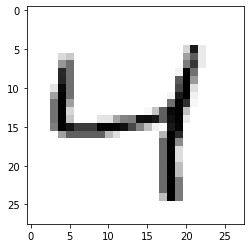

In [45]:
import numpy as np
import matplotlib.pyplot as plt
all_values= data_list[2].split(',')
image_array= np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap='Greys',interpolation='None')

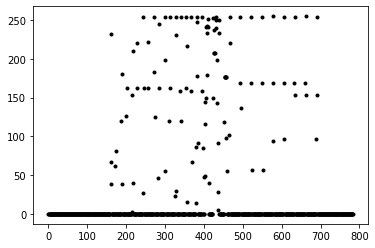

In [47]:
plt.plot(np.asfarray(all_values[1:]), '.k')

# The ANN for MNIST data

In [79]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# learning rate
learning_rate = 0.1

# create instance of neural network
nn1 = NeuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [80]:
# train the neural network

# epochs is the number of times the training data set is used for training
epochs = 10

for e in range(epochs):
    # go through all records in the training data set
    for record in data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = np.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        nn1.backpropagation(inputs, targets)
        pass
    pass

In [92]:
# load the mnist test data CSV file into a list
test_data_file = open("mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

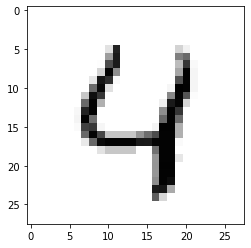

In [95]:
all_values= test_data_list[4].split(',')
image_array= np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap='Greys',interpolation='None')

In [96]:
nn1.feedforward((np.asfarray(all_values[1:])/255.0*0.99)+0.01)

array([[4.21194730e-07],
       [2.58694919e-11],
       [3.09152752e-12],
       [1.18559956e-21],
       [1.90577835e-30],
       [9.08318920e-34],
       [5.64631944e-10],
       [3.42005457e-18],
       [6.10337091e-17],
       [1.00000000e+00]])